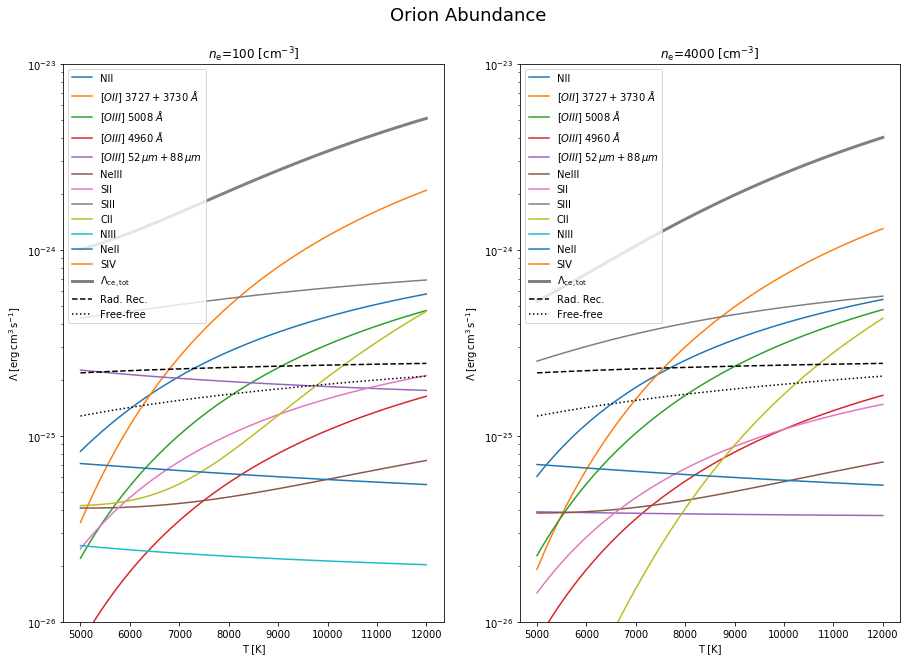

In [4]:
import cool_tigress as ct

T = np.linspace(5e3, 1.2e4, num=50)
kind = 'AGN2'
kind = 'Orion'
#kind = 'Lexington'
fig, axes = plt.subplots(1, 2, figsize=(15, 10))
plt.sca(axes[0])
n_e = 1e2
lc = ct.LineCool(n_e=n_e, T=T, kind=kind)
lcool = lc.get_linecool_all()
for e in lc.Elem:
    if e.name == 'OIII':
        cool1 = lcool[e.name]['5008A']/lc.n_e
        cool2 = lcool[e.name]['4960A']/lc.n_e
        cool3 = (lcool[e.name]['88mu'] + lcool[e.name]['52mu'])/lc.n_e
        plt.plot(lc.T, cool1, label=r'$[OIII]\;5008\;\AA$')
        plt.plot(lc.T, cool2, label=r'$[OIII]\;4960\;\AA$')
        plt.plot(lc.T, cool3, label=r'$[OIII]\;52\,\mu m + 88\,\mu m$')
    elif e.name == 'OII':
        cool1 = lcool[e.name]['3727A']/lc.n_e
        cool2 = lcool[e.name]['3730A']/lc.n_e
        plt.plot(lc.T, cool1 + cool2, label=r'$[OII]\;3727 + 3730\;\AA$')
        #plt.plot(lc.T, cool1, label=r'$[OII]\;3727\;\AA$')
        #plt.plot(lc.T, cool2, label=r'$[OII]\;3730\;\AA$')
    else:
        cool = lcool[e.name]['tot']/lc.n_e
        # Plot only non-zero cooling rates
        if any(cool):
            plt.plot(lc.T, cool, label=e.name)
        
plt.plot(lc.T, lc.cooling_ce_tot/lc.n_e, c='grey', lw=3.0, label=r'$\Lambda_{\rm ce, tot}$')
plt.plot(lc.T, lc.cooling_rr/lc.n_e, c='k', ls='--', label='Rad. Rec.')
plt.plot(lc.T, lc.cooling_ff/lc.n_e, c='k', ls=':', label='Free-free')
plt.yscale('log')
ylim = plt.gca().get_ylim()
#plt.ylim(ylim[1]*1e-3, ylim[1])
plt.ylim(1e-26, 1e-23)
plt.legend()
plt.title(r'$n_{\rm e}$' + '={0:g}'.format(n_e) + r' [${\rm cm}^{-3}$]')
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda\;[{\rm erg}\,{\rm cm}^3\,{\rm s}^{-1}$]')

plt.sca(axes[1])
n_e = 4e3
lc = ct.LineCool(n_e=n_e, T=T, kind=kind)
lcool = lc.get_linecool_all()
for e in lc.Elem:
    if e.name == 'OIII':
        cool1 = lcool[e.name]['5008A']/lc.n_e
        cool2 = lcool[e.name]['4960A']/lc.n_e
        cool3 = (lcool[e.name]['88mu'] + lcool[e.name]['52mu'])/lc.n_e
        plt.plot(lc.T, cool1, label=r'$[OIII]\;5008\;\AA$')
        plt.plot(lc.T, cool2, label=r'$[OIII]\;4960\;\AA$')
        plt.plot(lc.T, cool3, label=r'$[OIII]\;52\,\mu m + 88\,\mu m$')
    elif e.name == 'OII':
        cool1 = lcool[e.name]['3727A']/lc.n_e
        cool2 = lcool[e.name]['3730A']/lc.n_e
        plt.plot(lc.T, cool1 + cool2, label=r'$[OII]\;3727 + 3730\;\AA$')
        #plt.plot(lc.T, cool1, label=r'$[OII]\;3727\;\AA$')
        #plt.plot(lc.T, cool2, label=r'$[OII]\;3730\;\AA$')
    else:
        cool = lcool[e.name]['tot']/lc.n_e
        # Plot only non-zero cooling rates
        if any(cool):
            plt.plot(lc.T, cool, label=e.name)
        
plt.plot(lc.T, lc.cooling_ce_tot/lc.n_e, c='grey', lw=3.0, label=r'$\Lambda_{\rm ce, tot}$')
plt.plot(lc.T, lc.cooling_rr/lc.n_e, c='k', ls='--', label='Rad. Rec.')
plt.plot(lc.T, lc.cooling_ff/lc.n_e, c='k', ls=':', label='Free-free')
plt.yscale('log')
ylim = plt.gca().get_ylim()
#plt.ylim(ylim[1]*1e-3, ylim[1])
plt.ylim(1e-26, 1e-23)
plt.legend()
plt.title(r'$n_{\rm e}$' + '={0:g}'.format(n_e) + r' [${\rm cm}^{-3}$]')
plt.xlabel('T [K]')
plt.ylabel(r'$\Lambda\;[{\rm erg}\,{\rm cm}^3\,{\rm s}^{-1}$]')

plt.suptitle('{:s} Abundance'.format(lc.kind), fontsize=18, va='top')
plt.subplots_adjust(top=0.9)

(1.7043167901908915e-26, 1.7043167901908915e-22)

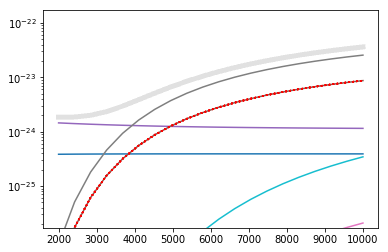

In [58]:
import cool_tigress as ct
T = np.linspace(2e3, 1e4, num=20)
#T = np.array([5e3, 1e4])
#T = 1e4
n_e = 1e2
lc = ct.LineCool(T=T,kind='Lexington')
lstr_5lv = lc.compute_line_str_5lv()
lstr_5lv.shape

r = dict()
r['NII'] = lstr_5lv[...,lc.Elem.NII,:]
r['NIItot'] = lstr_5lv[...,lc.Elem.NII,:].sum(axis=1)
r['NII6585'] = lstr_5lv[...,lc.Elem.NII,lc.Trans.T23]
r['NII6550'] = lstr_5lv[...,lc.Elem.NII,lc.Trans.T13]

for t in lc.Trans:
    plt.plot(T, lstr_5lv[:, lc.Elem.NII, :].sum(axis=1), c='k', ls='-', lw=5.0, alpha=0.01)
    plt.plot(T, lstr_5lv[:, lc.Elem.NII, t.value])
    plt.plot(T, r['NII6550'],'r:')

    #plt.plot(T, lstr_5lv[:, lc.Elem.NII, :])

plt.yscale('log')
plt.ylim(plt.gca().get_ylim()[1]*1e-4, plt.gca().get_ylim()[1])
    #lstr_5lv = lc.compute_line_str_5lv()
#ct.get_linecooling_5lv()
#ct.get_line_str_5lv()
#ct.get_line_str_5lv(T, n_e, lc)


In [61]:
getattr(lc.Elem, 'NII')

<LineCoolElemEnum.NII: 1>

In [17]:
lstr_5lv

array([[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
       [3.683200331497229e-25, 2.736272056063589e-31,
        6.801163717722353e-119, 0.0, 1.137324026668492e-24,
        1.9381010763633904e-115, 1.0670565423249247e-224,
        5.701452546854432e-115, 4.2452227225325515e-227,
        1.7622037800892032e-223],
       [0.0, 0.0, -0.0, -0.0, 0.0, -0.0, -0.0, -0.0, -0.0, -0.0],
       [6.023234180257243e-188, 1.2111572097317896e-187,
        5.6908494235946237e-272, 1.3888649544858232e-272,
        6.756682274146278e-194, 3.762279758609161e-272,
        1.2053902791476345e-272, 1.9942542052180845e-272,
        1.9980923488898015e-272, 1.2440383839313686e-284],
       [5.607758770978098e-23, 1.7768016920339263e-29,
        4.81957491740342e-148, 0.0, 3.500139846191642e-23,
        1.9836307650055085e-144, 2.0052746523660996e-288,
        5.732425396301316e-144, 5.361286595017917e-291,
        7.341785289609599e-288],
       [-0.0, 0.0, 0.0, -0.0, 0.0, 0.0, -0.0, 0.0, -0.0, -0.0],

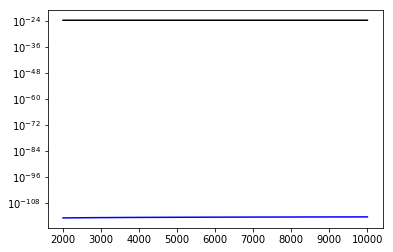

In [108]:
plt.plot(lc.T, r['NII'].sum(axis=1), 'k-')
#plt.plot(lc.T, r['NII6585'], 'r-')
plt.plot(lc.T, r['NII6550'], 'b-')
plt.yscale('log')

In [64]:
ct.loadlib()
#T = np.array([8e3, 1e4])
T = 8e3
ne = 1e2
ntrans = 10
n5lv = 10
line_str = ct.get_line_str_5lv(T, ne, abd)
TE = ct.LineCoolTransitionEnum

(3.676252010575807e-24,
 3.0345666461998837e-25,
 1.7378330337661918e-25,
 1.0500545232914728e-24)

# Get Einstein A

In [2]:
for EE_ in Elem:

Tran = ct.LineCoolTransitionEnum
A = dict()
for EE_ in Elem:
    A[EE_.name] = float(ct.get_A(EE_, Tran.T01))

{'NI': 7.566e-06,
 'NII': 2.077e-06,
 'OI': 8.865e-05,
 'OII': 4.124e-05,
 'OIII': 2.664e-05,
 'NeIII': 0.005974,
 'SII': 0.000632,
 'SIII': 0.000472,
 'CII': 2.321e-06,
 'CIII': 0.0,
 'NIII': 27659.5881240195,
 'NELEM_5LV': 27659.5881240195,
 'NeII': 70.06845694500001,
 'SIV': 227.3268213,
 'NELEM': 38574.6710609655}